# Box Office Mojo - Regression1

Importing packages

In [57]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import numpy as np
import pickle

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Loading pickled dataframe

In [58]:
earliestrelease_notdomestic_movies2 = pd.read_pickle('earliestrelease_notdomestic_movies2.pickle')

In [59]:
earliestrelease_notdomestic_movies2.tail(3)

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,release_date,domestic_distributor,domestic_total_gross,international_total_gross,earliest_release_location,runtime,genres,crew,cast,earliest_release_location_opening_gross,earliest_release_location_original_gross
La folle histoire de Max et Léon,543.0,1.0,21307.0,4.0,2017-03-15,Distrib Films,543.0,8750135.0,France,98.0,Comedy War,"Jonathan Barré Director, Jonathan Barré Writer...","David Marsais, Grégoire Ludig, Alice Vial, Sas...",25579.0,543.0
A Bloody Aria,518.0,1.0,249.0,1.0,2008-01-04,ImaginAsian Pictures,518.0,590437.0,South Korea,115.0,Action Drama Horror Thriller,"Shin-yeon Won Director, Shin-yeon Won Writer, ...","Ye-ryeon Cha, Suk-kyu Han, Kyung Ho Jung, Shi-...",336361.0,584409.0
News from Planet Mars,310.0,1.0,24.0,1.0,2016-07-22,Kino Lorber,310.0,77822.0,Belgium,101.0,Comedy Drama,"Dominik Moll Director, Dominik Moll Writer, Gi...","François Damiens, Vincent Macaigne, Veerle Bae...",24.0,310.0


In [60]:
earliestrelease_notdomestic_movies2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, Hero to News from Planet Mars
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   lifetime_gross                            1659 non-null   float64       
 1   max_theaters                              1659 non-null   float64       
 2   domestic_opening                          1659 non-null   float64       
 3   num_opening_theaters                      1659 non-null   float64       
 4   release_date                              1659 non-null   datetime64[ns]
 5   domestic_distributor                      1659 non-null   object        
 6   domestic_total_gross                      1659 non-null   float64       
 7   international_total_gross                 1659 non-null   float64       
 8   earliest_release_location                 1659 non-null   object        
 9   runtime        

In [61]:
smaller_df = earliestrelease_notdomestic_movies2.loc[:,['lifetime_gross', 'max_theaters', 'domestic_opening', 
                      'num_opening_theaters','domestic_total_gross', 'international_total_gross', 
                      'earliest_release_location_opening_gross', 'earliest_release_location_original_gross']]

In [62]:
smaller_df.corr()

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,domestic_total_gross,international_total_gross,earliest_release_location_opening_gross,earliest_release_location_original_gross
lifetime_gross,1.000000,0.761441,0.612631,0.471362,0.999332,0.258718,0.100843,0.234871
max_theaters,0.761441,1.000000,0.589510,0.662291,0.762057,0.174393,0.094865,0.175460
domestic_opening,0.612631,0.589510,1.000000,0.837552,0.610537,0.178911,0.171120,0.143318
num_opening_theaters,0.471362,0.662291,0.837552,1.000000,0.469359,0.090114,0.140765,0.106942
domestic_total_gross,0.999332,0.762057,0.610537,0.469359,1.000000,0.263411,0.100454,0.234638
international_total_gross,0.258718,0.174393,0.178911,0.090114,0.263411,1.000000,0.241196,0.269118
earliest_release_location_opening_gross,0.100843,0.094865,0.171120,0.140765,0.100454,0.241196,1.000000,0.976846
earliest_release_location_original_gross,0.234871,0.175460,0.143318,0.106942,0.234638,0.269118,0.976846,1.000000


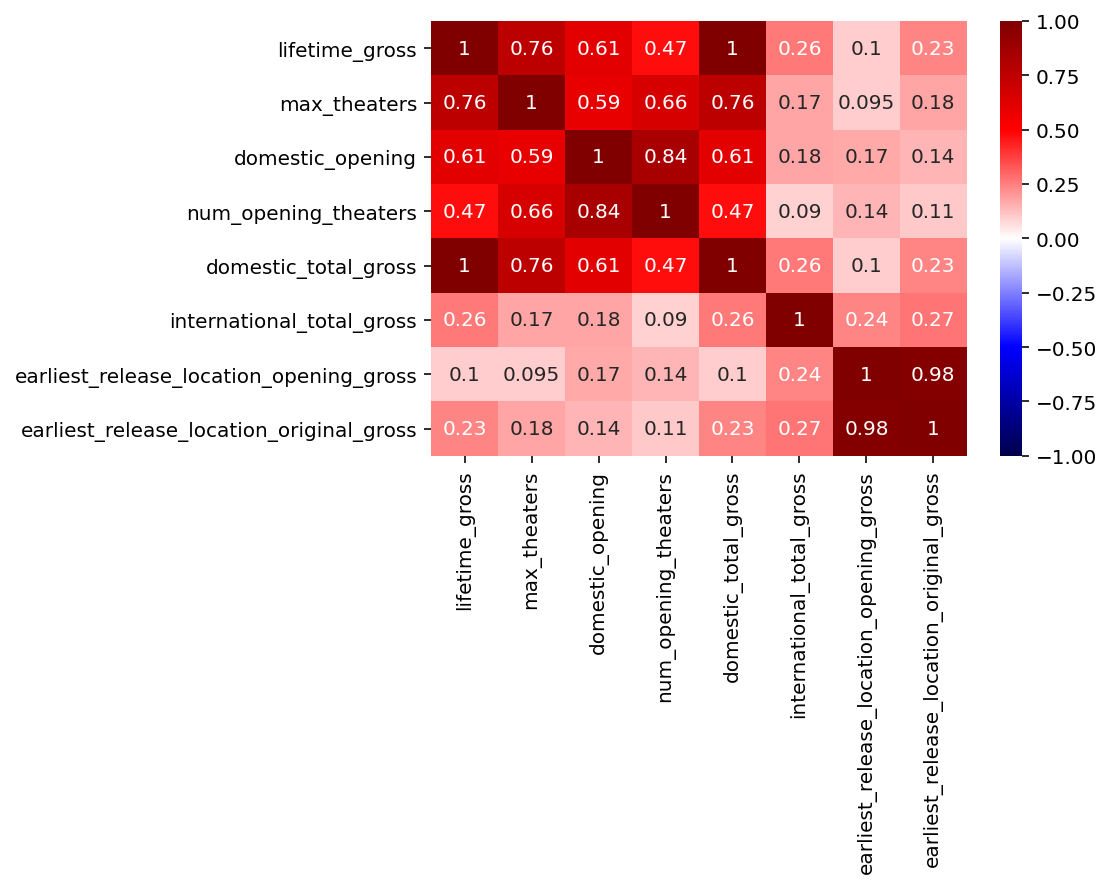

In [63]:
sns.heatmap(smaller_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

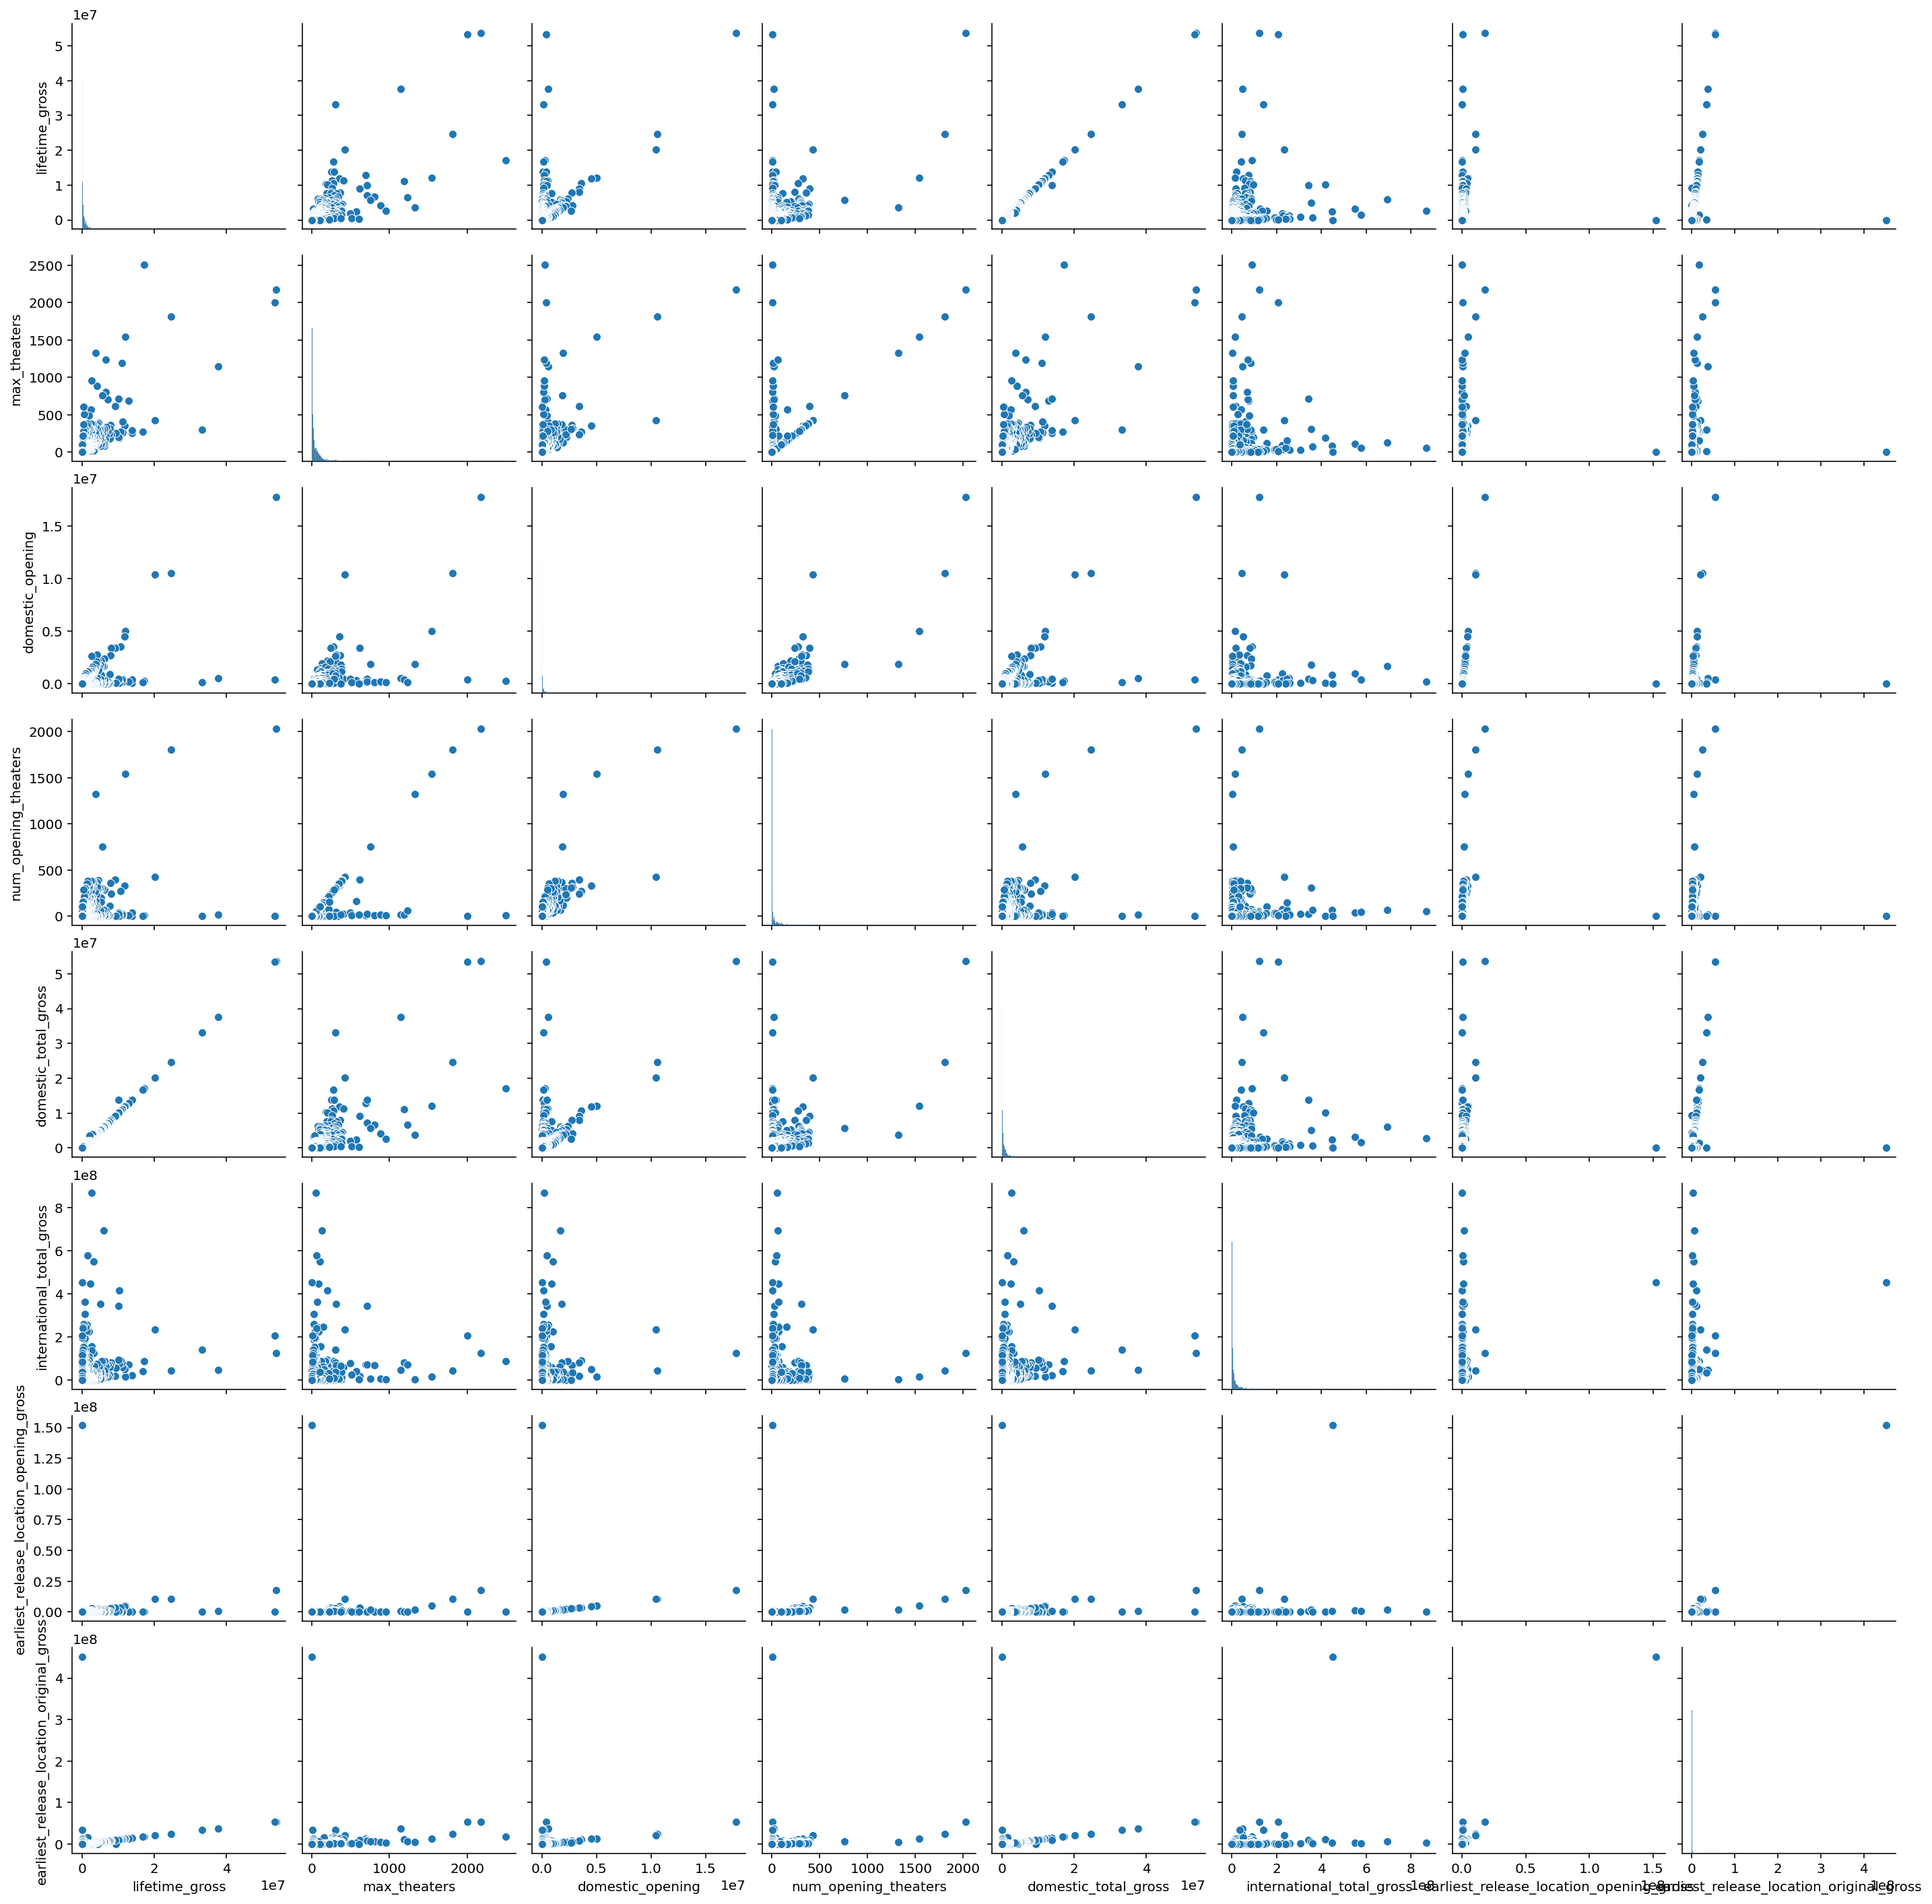

In [65]:
sns.pairplot(smaller_df)

### Splitting up training data into training and test set 

In [147]:
X = smaller_df.loc[:,['max_theaters','num_opening_theaters','international_total_gross', 'earliest_release_location_original_gross']]
y = smaller_df['domestic_total_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

### Splitting training data into training and validation 

In [148]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

### Setting up three models 

In [149]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

### Training, validating, and testing the models 

In [150]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.521
Ridge Regression val R^2: 0.521
Degree 2 polynomial regression val R^2: 0.856


In [151]:
lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_test, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.641


In [159]:
test_set_pred = lm_poly.predict(X_test)

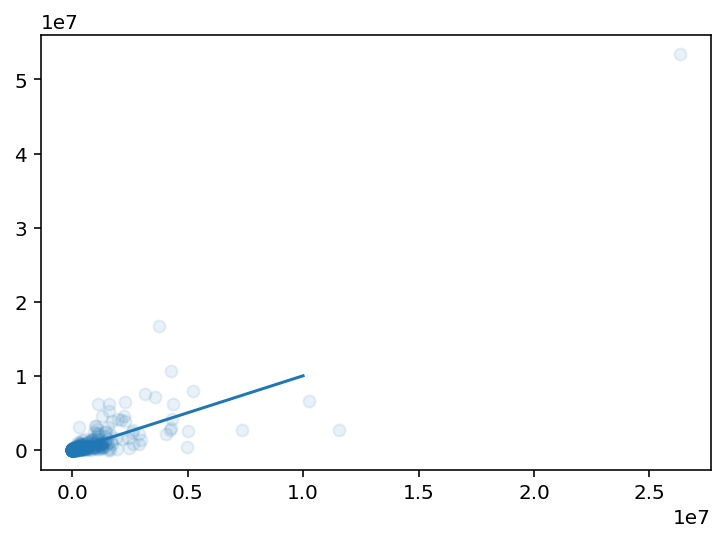

In [160]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,10000000,1000), np.linspace(0,10000000,1000))

## Regression model attempt 2 

In [120]:
X = smaller_df.loc[:,['max_theaters','num_opening_theaters','international_total_gross', 'earliest_release_location_original_gross']]
y = smaller_df['domestic_total_gross']
   
X['international_total_gross'] = np.log(X['international_total_gross'])

In [121]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [122]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [123]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [124]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.511
Ridge Regression val R^2: 0.511
Degree 2 polynomial regression val R^2: 0.878


In [132]:
lm_poly.fit(X,y)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_test, y_test):.3f}')

Degree 2 polynomial regression val R^2: 0.640


## Regression model attempt 3 - cross validation

### Split data into training set and holdout set

In [116]:
from sklearn.model_selection import KFold

X = smaller_df.loc[:,['max_theaters', 
                      'num_opening_theaters','international_total_gross', 
                      'earliest_release_location_original_gross']]
y = smaller_df['domestic_total_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

### Split training data into multiple folds

https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/